In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn import datasets

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
np.random.seed(100)

In [ ]:
class kMeans():
  def __init__(self, dimension, k):
    self._dimension = dimension
    self._clusters = k
    self._prototypes = np.zeros((k, dimension))

  def __sample_with_prob(self, sample_space, probability, num_samples=1):
    idx = [i for i in range(sample_space.shape[0])]
    pos = np.random.choice(idx, p=probability)

    return sample_space[pos]

  def __initialize_prototypes(self, X):
    probs = None
    center = self.__sample_with_prob(X, probs)
    self._prototypes[0, :] = center

    for i in range(1, self._clusters):
      probs = self.__nearest_cluster_dist(X, i)
      probs = [j ** 2 for j in probs]
      tot = sum(probs)
      probs = [j/tot for j in probs]
      center = self.__sample_with_prob(X, probs)
      self._prototypes[i, :] = center

  def __nearest_cluster_dist(self, X, i=None, clust_assign=False):
    if i is not None:
      prototypes = self._prototypes[0:i, :]
    else:
      prototypes = self._prototypes
    dists = list()
    for x in X:
      temp = []
      for cluster in prototypes:
        temp.append(np.linalg.norm(x - cluster))
      if clust_assign:
        dists.append(np.argmin(temp))
      else:
        dists.append(np.min(temp))
    return dists

  def __cluster_means(self, X, c):
    c = np.array(c)
    centroids = np.zeros(self._prototypes.shape)
    for k in range(self._clusters):
      cluster_group = X[c == k, :]
      centroids[k, :] = cluster_group.mean(axis=0)
    return centroids

  def __WCSS(self, X, c):
    s = 0
    for i, x in enumerate(X):
      s += np.linalg.norm(x - self._prototypes[c[i]]) ** 2
    return s

  def fit(self, X, max_iterations=3000):
    self.__initialize_prototypes(X)
    current = self._prototypes

    for i in range(max_iterations):
    # while True:
      c = self.__nearest_cluster_dist(X, clust_assign=True)
      centroids = self.__cluster_means(X, c)
      
      if np.array_equal(centroids, self._prototypes):
        # print(f"Converged in {i+1} iterations")
        return self.__WCSS(X, c)

      self._prototypes = centroids
    
    print(f"Reached Max Iterations but not converged.")
    return self.__WCSS(X, c)

In [ ]:
X, _ = load_iris(return_X_y=True)
WCSS = list()

for k in range(1, 12):
  model = kMeans(X.shape[1], k)
  s = model.fit(X)
  WCSS.append(s)
  print(f"K: {k}, WCSS = {s}")

K: 1, WCSS = 681.3706000000001
K: 2, WCSS = 152.34795176035803
K: 3, WCSS = 78.85566582597724
K: 4, WCSS = 57.25600931571815
K: 5, WCSS = 49.86225000000002
K: 6, WCSS = 39.03998724608726
K: 7, WCSS = 41.30235732323235
K: 8, WCSS = 36.441811688311724
K: 9, WCSS = 31.869045227577203
K: 10, WCSS = 31.469073529411773
K: 11, WCSS = 25.770215197083633


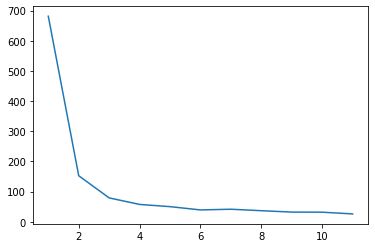

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot([i for i in range(1, 12)], WCSS)